In [ ]:
# Real estate data analysis (after Covid outbreak - February till July 16, 2020 )

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [2]:
# loading property sales data file
ppt_df = pd.read_csv('Resources/vic-sales-postcovid.csv')

In [3]:
# calculating stats

avg_price = ppt_df.price.mean()
median_price = ppt_df.price.median()
lowest_price = ppt_df.price.min()
highest_price = ppt_df.price.max()

lowest_priced_sub = ppt_df.loc[ppt_df['price']==lowest_price]['suburb'].values
highest_priced_sub = ppt_df.loc[ppt_df['price']==highest_price]['suburb'].values

In [4]:
# lowest & highest values property sold
print('--------------------------------------------------------------------')
print(f"The suburb has the lowest price property sold at AU$ {lowest_price:0,.0f} in {lowest_priced_sub}");
print(f"The suburb has the highest price property sold at AU$ {highest_price:0,.0f} in {highest_priced_sub}");
print('---------------------------------------------------------------------')

--------------------------------------------------------------------
The suburb has the lowest price property sold at AU$ 1,000 in ['Werribee' 'Werribee']
The suburb has the highest price property sold at AU$ 8,000,000 in ['South Yarra' 'South Yarra']
---------------------------------------------------------------------


In [5]:
# Calculation of IQR and Outliers


quartiles = ppt_df.price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# print(f"The lower quartile of property price is: {lowerq:0,.0f}")
# print(f"The upper quartile of property price is: {upperq:0,.0f}")
# print(f"The interquartile range of property price is: {iqr:0,.0f}")
# print(f"The median of property price is: {quartiles[0.5]:0,.0f}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# print(f"* Values below {lower_bound:0,.0f} could be outliers.")
# print(f"* Values above {upper_bound:0,.0f} could be outliers.")

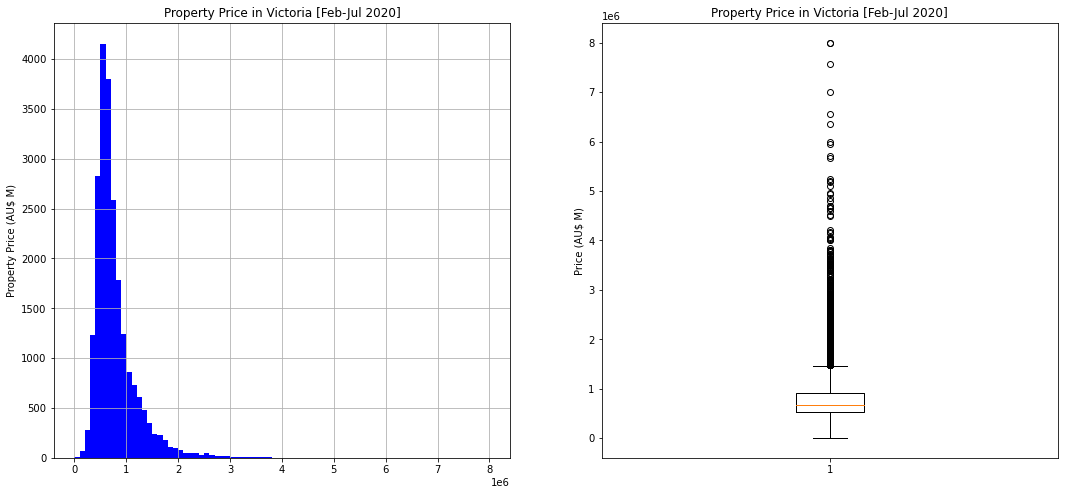

-------------------------------------------------------
The average values of property sold is: AU$ 790,517
The median values of property sold is: AU$ 667,000
-------------------------------------------------------
                                                531,250 is the lower quartile of property price
                                                905,000 is the upper quartile of property price
                                                373,750 is the interquartile range of property price
                                                667,000 is the median of property price

              * Values less than -29,375 or greater than 1,465,625 could be outliers.


In [6]:
# histogram chart

plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)

plt.hist(ppt_df.price, bins = 80, color = 'blue');
plt.ylabel("Property Price (AU$ M)")
plt.grid()

plt.title('Property Price in Victoria [Feb-Jul 2020]')
# boxplot chart

plt.subplot(1, 2, 2)

plt.boxplot(ppt_df.price);
plt.title('Property Price in Victoria [Feb-Jul 2020]')
plt.ylabel('Price (AU$ M)')
plt.show()

print('-------------------------------------------------------')
print(f"The average values of property sold is: AU$ {avg_price:0,.0f}")
print(f"The median values of property sold is: AU$ {median_price:0,.0f}")
print('-------------------------------------------------------')

txt1 = f"{lowerq:0,.0f}"
txt2 = f"{upperq:0,.0f}"
txt3 = f"{iqr:0,.0f}"
txt4 = f"{quartiles[0.5]:0,.0f}"
print(txt1.rjust(55), "is the lower quartile of property price" )
print(txt2.rjust(55), "is the upper quartile of property price")
print(txt3.rjust(55), "is the interquartile range of property price")
print(txt4.rjust(55), "is the median of property price\n")
print(f"              * Values less than {lower_bound:0,.0f} or greater than {upper_bound:0,.0f} could be outliers.")


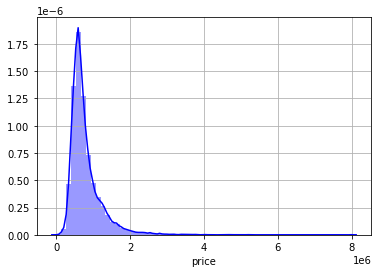

In [7]:

sns.distplot(ppt_df.price, bins = 60, color = 'blue')
plt.grid()

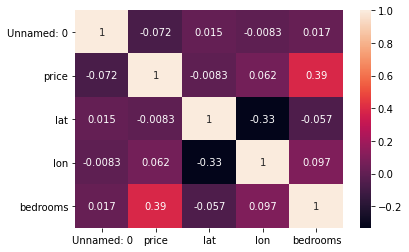

In [8]:
sns.heatmap(ppt_df.corr(), annot=True)

In [9]:
# removing the properties values less than $5,000
rm_index = ppt_df.loc[ppt_df.price < 5000]
ppt_df = ppt_df.drop(rm_index.index)

In [35]:
# loading covid dataset
covid_df = pd.read_excel('Resources/covid_data.xlsx')
covid_df.head()

,Local Government Area,Cases,Date
0,STONNINGTON,84,4042020
1,BANYULE,64,4042020
2,BOROONDARA,56,4042020
3,GREATER GEELONG,54,4042020
4,MORNINGTON PENINSULA,52,4042020


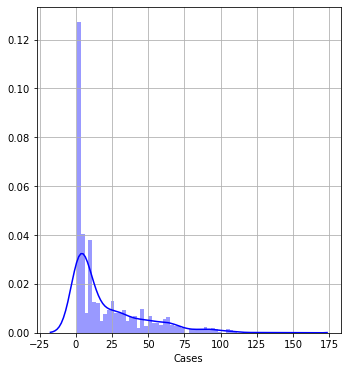

In [40]:
# having a look at the data

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.distplot(covid_df.Cases, bins = 60, color = 'blue')
plt.grid()
plt.show()


In [18]:
# convert data to suitable datatype
covid_df['Date'] = covid_df['Date'].astype(str)
covid_df['Cases'] = covid_df['Cases'].astype(int)

# function to store month data
covid_df['Month'] = covid_df.Date.apply(lambda x: x[x.rfind('2020')-2:x.rfind('2020')])

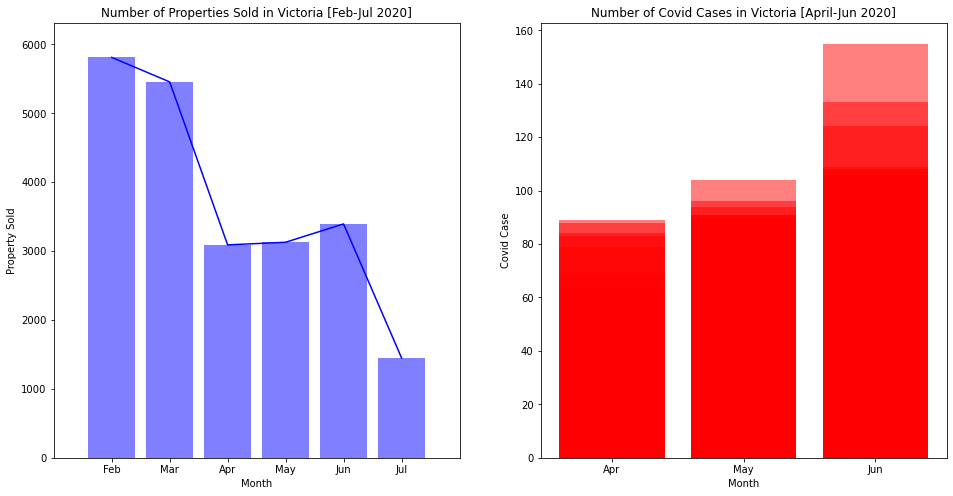

In [26]:
# property sold chart

plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)

y_axis = ppt_by_month.suburb
x_axis = ppt_by_month.month_sold
plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align="center")
tick_locations = [v for v in x_axis]
plt.xticks(tick_locations, ["Feb", "Mar", "Apr", "May", "Jun","Jul"])
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+500)
plt.xlabel('Month')
plt.ylabel('Property Sold')
plt.title('Number of Properties Sold in Victoria [Feb-Jul 2020]')
plt.plot(x_axis, y_axis, color='blue')


# covid cases chart
plt.subplot(1, 2, 2)
x_axis = covid_df['Month'].astype(int)
y_axis = covid_df.Cases
 
plt.bar(x_axis, y_axis, color='red', alpha=0.5, align="center")
tick_locations = [4, 5, 6]
plt.xticks(tick_locations, ["Apr", "May", "Jun"])
#plt.xlim(5, len(x_axis)+5)
#plt.ylim(0, max(y_axis) + 5)
plt.xlabel('Month')
plt.ylabel('Covid Case')
plt.title('Number of Covid Cases in Victoria [April-Jun 2020]')
plt.show()


In [10]:
ppt_by_date = ppt_df.groupby('date_sold').count().reset_index()
ppt_by_date.head()

,date_sold,Unnamed: 0,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,LGA_Name
0,2020-02-01,131,131,131,131,131,131,131,131,131,131,131,131
1,2020-02-02,27,27,27,27,27,27,27,27,27,27,27,27
2,2020-02-03,142,142,142,142,142,142,142,142,142,142,142,142
3,2020-02-04,155,155,155,155,155,155,155,155,155,155,155,155
4,2020-02-05,123,123,123,123,123,123,123,123,123,123,123,123


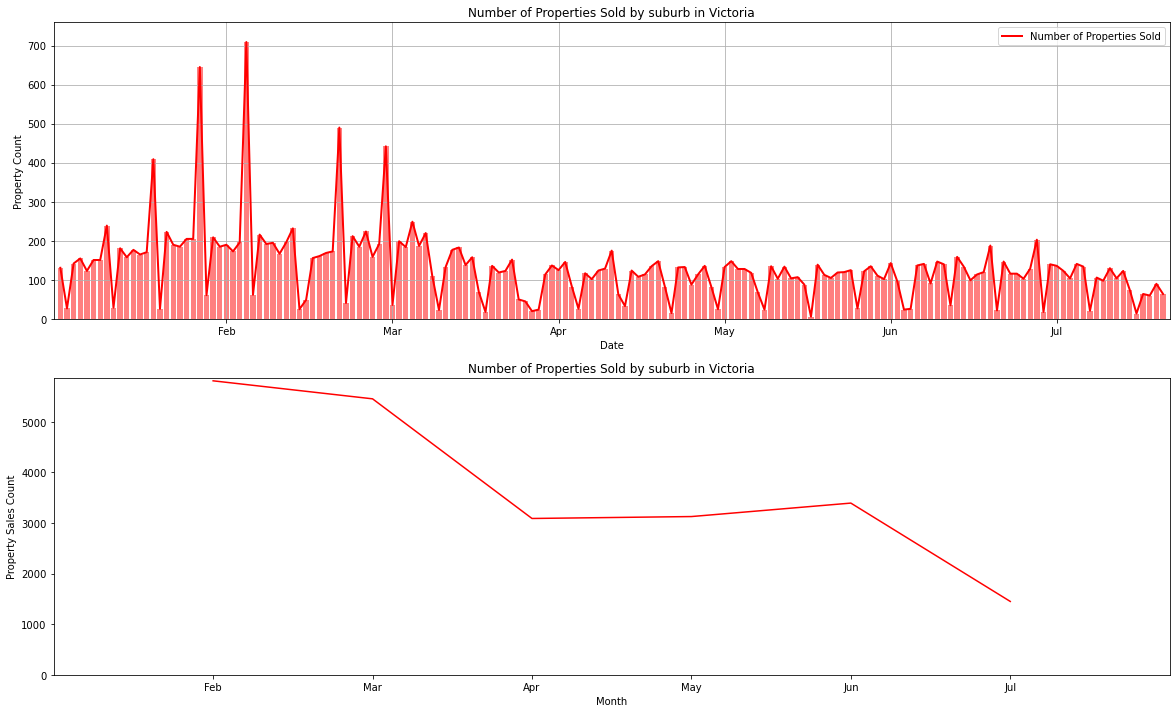

In [31]:
# property sold by date
y_axis = ppt_by_date.suburb
x_axis = ppt_by_date.date_sold

plt.figure(figsize=(20,12))

plt.subplot(2, 1, 1)


plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

tick_locations = [25, 50, 75, 100, 125, 150]
plt.xticks(tick_locations, ["Feb", "Mar", "Apr", "May", "Jun","Jul"])
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+50)
plt.xlabel('Date')
plt.ylabel('Property Count')
plt.title('Number of Properties Sold by suburb in Victoria')

#ppt_by_date.plot(x = 'date_sold', y= 'suburb', color='orange', label='Number of Properties Sold', linewidth= 2)
x = ppt_by_date.date_sold
y = ppt_by_date.suburb
plt.plot(x, y, color='red', label='Number of Properties Sold', linewidth= 2)
plt.ylabel('Property Count')
plt.xlabel('Date')
plt.title('Number of Properties Sold by suburb in Victoria')
plt.legend(loc='best')
plt.grid()


plt.subplot(2, 1, 2)
x_axis = ppt_by_month.month_sold
y_axis = ppt_by_month.suburb

plt.plot(x_axis, y_axis, color='r')
tick_locations = [v for v in x_axis]
plt.xticks(tick_locations, ["Feb", "Mar", "Apr", "May", "Jun","Jul"])
#plt.xticks(tick_locations, x_axis, fontsize = 7 )
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+50)
plt.xlabel('Month')
plt.ylabel('Property Sales Count')
plt.title('Number of Properties Sold by suburb in Victoria')

plt.show()

In [12]:
# grouping properties sold by month
ppt_by_date['date_sold'] = ppt_by_date['date_sold'].astype(str);
ppt_by_date['month_sold'] = ppt_by_date.date_sold.apply(lambda x: x[5:7])
ppt_by_month = ppt_by_date.groupby('month_sold').sum().reset_index()
ppt_by_month

,month_sold,Unnamed: 0,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,LGA_Name
0,02,5811,5811,5811,5811,5811,5811,5811,5811,5811,5811,5811,5811
1,03,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455
2,04,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090
3,05,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128
4,06,3394,3394,3394,3394,3394,3394,3394,3394,3394,3394,3394,3394
5,07,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450


In [ ]:
# grouping properties sold by lga
ppt_df = pd.read_csv('Resources/vic-sales-postcovid.csv')
ppt_lga_df = ppt_df.groupby(['date_sold','lga_pid']) #('count') 

#ppt_lga_df
#,inplace=True)
#ppt_df.reset_index() #head() #.groupby('lga_pid')[['date_sold','suburb']].count()

In [ ]:
sorted_ppt_df = ppt_df.sort_values(by=['date_sold','lga_pid'])
sorted_ppt_df.head()

In [ ]:
sorted_ppt_df = sorted_ppt_df[['date_sold','lga_pid','suburb','price']]
#lga_count = sorted_ppt_df['lga_pid'].value_counts().reset_index()
suburb_count = sorted_ppt_df['suburb'].value_counts().reset_index()
suburb_count = suburb_count.rename(columns={'index':'suburb', 'suburb':'property_sold'})
#dt_count = sorted_ppt_df['date_sold'].value_counts() #['lga_pid'].value_counts()
suburb_count.head()

In [ ]:
# lga_count = lga_count.rename(columns={'index':'lga_pid', 'lga_pid':'property_sold'})
# lga_count['LGA_ID'] = lga_count.lga_pid.apply(lambda x: x[x.rfind('C')+1:x.rfind('C')+4])

# lga_count.head()

In [ ]:
# suburb_lga_df = pd.read_csv('output/suburb_lga_postcode_df.csv')
# suburb_lga_df.LGA_ID = suburb_lga_df.LGA_ID.astype(str)
# suburb_lga_df = suburb_lga_df.rename(columns={'Suburb':'suburb'})
# suburb_lga_df




# # merging to get local government name
# merged_lga_df = pd.merge(sorted_ppt_df,suburb_lga_df , how = "left", on = "suburb")
# merged_lga_df.tail()

In [ ]:
x_axis = suburb_count.suburb 
y_axis = suburb_count.property_sold

plt.figure(figsize=(25,13)) 
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
tick_locations = [v for v in x_axis]
plt.xticks(tick_locations, x_axis, rotation='90', fontsize = 7 )
plt.xlim(-5, len(x_axis)+ 5)
plt.ylim(0, max(y_axis) + 50)
plt.xlabel('Suburb')
plt.ylabel('Property Sold')
plt.title('Number of Property Sold by Subrub in Victoria [Feb-Jul 2020]')
plt.show()

In [ ]:
sorted_ppt_df['date_sold'] = sorted_ppt_df['date_sold'].astype(str);
sorted_ppt_df['date_sold'] = sorted_ppt_df.date_sold.apply(lambda x: x[5:7])
sorted_ppt_df['month_sold'] = sorted_ppt_df.groupby('date_sold').count()


In [ ]:
grouped_df = sorted_ppt_df.groupby(['date_sold','lga_pid'])['suburb'].value_counts()

In [ ]:
grouped_df = sorted_ppt_df.groupby(['date_sold','lga_pid'])['suburb'].value_counts()
grouped_df

In [ ]:
grouped_df = sorted_ppt_df.groupby(['date_sold','lga_pid'])['suburb'].value_counts()
grouped_df

In [ ]:
mgrouped_df = pd.DataFrame(grouped_df)
mgrouped_df = mgrouped_df.rename(columns={'date_sold':'month_sold','lga_pid':'lga_id','suburb':'sub_counts'}) #.reset_index()
mgrouped_df.reset_index(inplace=True)

In [ ]:
mgrouped_df

In [ ]:
plt.figure(figsize=(30,15))


x = mgrouped_df.date_sold.astype(int)
y = mgrouped_df.sub_counts
plt.bar(x, y, color='orange', label='Number of Properties Sold', linewidth= 2)
plt.ylabel('Property Count')
plt.xlabel('Date')
plt.title('Number of Properties Sold by suburb in Victoria')
plt.legend(loc='best')
#plt.grid()
plt.show()

In [ ]:
mgrouped_df = mgrouped_df.groupby(['date_sold','lga_pid','suburb']).sum()
mgrouped_df

In [ ]:
feb_df = 

In [ ]:
sorted_ppt_df = sorted_ppt_df[['month_sold','lga_pid','suburb','price']]
#sorted_ppt_df = sorted_ppt_df.reset_index()
sorted_ppt_df


#sorted_ppt_df.to_csv('output/sorted_ppt.csv')

In [ ]:
#sorted_ppt_df['LGA_ID'] = sorted_ppt_df.lga_pid.apply(lambda x: x[x.rfind('C')+1:x.rfind('C')+4])

In [ ]:
#sorted_ppt_df

In [ ]:
# grsorted_ppt_df = sorted_ppt_df.groupby(by=['month_sold','lga_pid'])
# grsorted_ppt_df.head()

In [ ]:
# suburb_lga_df = pd.read_csv('output/suburb_lga_postcode_df.csv')
# suburb_lga_df.LGA_ID = suburb_lga_df.LGA_ID.astype(str)
# suburb_lga_df = suburb_lga_df.rename(columns={'Suburb':'suburb'})
# suburb_lga_df

In [ ]:
# month_lga_lst = []
# mcount = 1

# for i, row in sorted_ppt_df.iterrows():
#     if not row['month_sold'] in month_lga_lst:
#         month_lga_lst.append(row['month_sold'])
#     if row['lga_pid'] in month_lga_lst:
#         mcount += 1
#     else:
#         month_lga_lst.append(row['lga_pid'])
#         month_lga_lst.append(mcount)
#         mcount =1
 